In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io as scio
import h5py
import math
import os
from utils import *
fileFolder = 'D:/study/bsegit/bse-pap/'

In [2]:
a = np.random.randn(5,5)
a

array([[-0.45906531, -0.33816431,  1.2130979 , -1.20770747, -1.59622063],
       [-0.0063026 , -2.11443601, -0.25448102, -1.16198687, -0.19749373],
       [-1.37845896, -0.19720576, -0.82596625, -0.7331153 ,  0.96286296],
       [-0.91568164,  0.63520895,  0.06066075, -1.01415088, -1.64784519],
       [-0.58634897, -0.84094651, -0.19052973,  0.98660644,  0.23690203]])

In [8]:
b = a[:,3]> 0
c = a[:,2]>0
b
c
b + c

array([ True, False, False,  True,  True])

In [5]:
c = a[b,:]


In [13]:
all_rb_1,all_wind_1 = ImportOriData(
    NumParallel     = 8,
    DataFolder      = '..\Data',
    OutName         = '0415',
    SaveNPY         = False,
    LoadNPY         = True)

In [16]:
ge=50
beaming=1
allinall=np.vstack((all_rb_1, all_wind_1))
minLx=39
maxLx=48
Lx_x=np.linspace(minLx,maxLx,ge);

In [18]:
[N_NSwind,N_NSrb] = plot_Lx_mesaNS(beaming,fileFolder='D:/study/bsegit/bsePopbin/Data/PaperPlotData')

In [20]:
temparray=all_rb_1[all_rb_1[:,9]==14,:].copy()
N_BHrb      = plot_Lx_NNsum_gedian(temparray,beaming)[0]

d:\study\bsegit\bsePopbin\Python\utils.py:450: RuntimeWarning: divide by zero encountered in log10
  return (NNsum,Lx_x,np.log10(NNsum))
d:\study\bsegit\bsePopbin\Python\utils.py:450: RuntimeWarning: divide by zero encountered in log10
  return (NNsum,Lx_x,np.log10(NNsum))


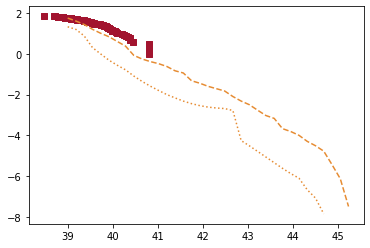

In [36]:
temparray=allinall[((allinall[:,9]==14) & (allinall[:,8]<=6)),:].copy()
_,Lx_x_plot,log10_NNsum_plt=plot_Lx_NNsum_gedian(temparray,beaming)
plt.plot(Lx_x_plot,log10_NNsum_plt,linestyle='--',color=(0.9010,0.550,0.2),label='BH-H')
temparray=allinall[tuple((allinall[:,9]==14) & (allinall[:,8]<=9) & (allinall[:,8]>=7)),:].copy()
_,Lx_x_plot,log10_NNsum_plt=plot_Lx_NNsum_gedian(temparray,beaming)
plt.plot(Lx_x_plot,log10_NNsum_plt,linestyle=':',color=(0.9010,0.550,0.2),label='BH-He')
(obssort,num)=OBSplot(1);
plt.scatter(obssort,num,marker='s',color=(0.6350,0.0780,0.1840),label='Obsevation')

d:\study\bsegit\bsePopbin\Python\utils.py:526: RuntimeWarning: divide by zero encountered in log10
  NN_m=np.log10(np.transpose(NN))
d:\study\bsegit\bsePopbin\Python\utils.py:532: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  h=plt.pcolor(mass_m,orb_m,NN_m,cmap=plt.cm.YlOrRd,norm=norm)


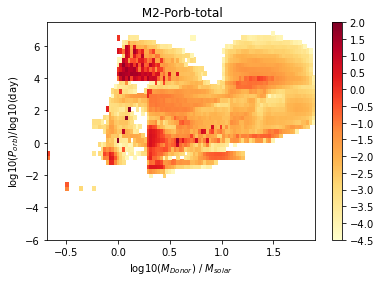

In [35]:
xge = 100
yge = 50
temparray = allinall.copy()
plot_mass_tb_gedian_paper(temparray,xge,yge,' M2-Porb-total',1e6);